In [1]:
import json
import numpy as np
import umap
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

from mpl_toolkits.mplot3d import Axes3D
import re
import plotly.graph_objects as go 

In [4]:
load_dotenv()

folder_path = os.getenv('path_vrubel_pics')

resnet50_vecs = os.getenv('resnet50_vecs_vrubel')
vit_vecs = os.getenv('vit_vecs_vrubel')
siglip_vecs = os.getenv('siglip_vecs_vrubel')
clip_vecs = os.getenv('clip_vecs_vrubel')
vgg19_vecs = os.getenv('vgg19_vecs_vrubel')

In [5]:
with open(resnet50_vecs, 'r', encoding='utf-8') as f:
    resnet50_dict = json.load(f)
    
with open(vit_vecs, 'r', encoding='utf-8') as f:
    vit_dict = json.load(f)
    
with open(siglip_vecs, 'r', encoding='utf-8') as f:
    siglip_dict = json.load(f)
    
with open(clip_vecs, 'r', encoding='utf-8') as f:
    clip_dict = json.load(f)
    
with open(vgg19_vecs, 'r', encoding='utf-8') as f:
    vgg19_dict = json.load(f)

In [6]:
len(vit_dict), len(resnet50_dict), len(siglip_dict), len(clip_dict), len(vgg19_dict)

(135, 135, 135, 135, 135)

In [ ]:
# before psychosis
count = 0
for i in resnet50_dict:
    if i.split('_')[0] != 'yyyy':
        if int(i.split('_')[0]) >= 1902:
            count += 1

print(f'До 1902: {len(resnet50_dict) - count}')
print(f'После лечения: {count}')

До 1819: 5
После лечения: 130


## U-map для векторов resnet50

In [8]:
features_resnet50 = np.array([resnet50_dict[filename] for filename in resnet50_dict])
filenames_resnet50 = list(resnet50_dict.keys())

In [9]:
filenames_pics_resnet50 = [filename.split('/')[-1] for filename in filenames_resnet50]

In [10]:
colors = []
for filename in filenames_pics_resnet50:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors.append('blue')
    elif int(filename.split('_')[0]) < 1902:
        colors.append('blue')
    else:
        colors.append('red') # red - after treatment

In [11]:
umap_resnet50 = umap.UMAP(
            n_neighbors=2,
            n_components=17, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

#### Для всех картин в датасете

In [12]:
results = umap_resnet50.fit_transform(features_resnet50)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


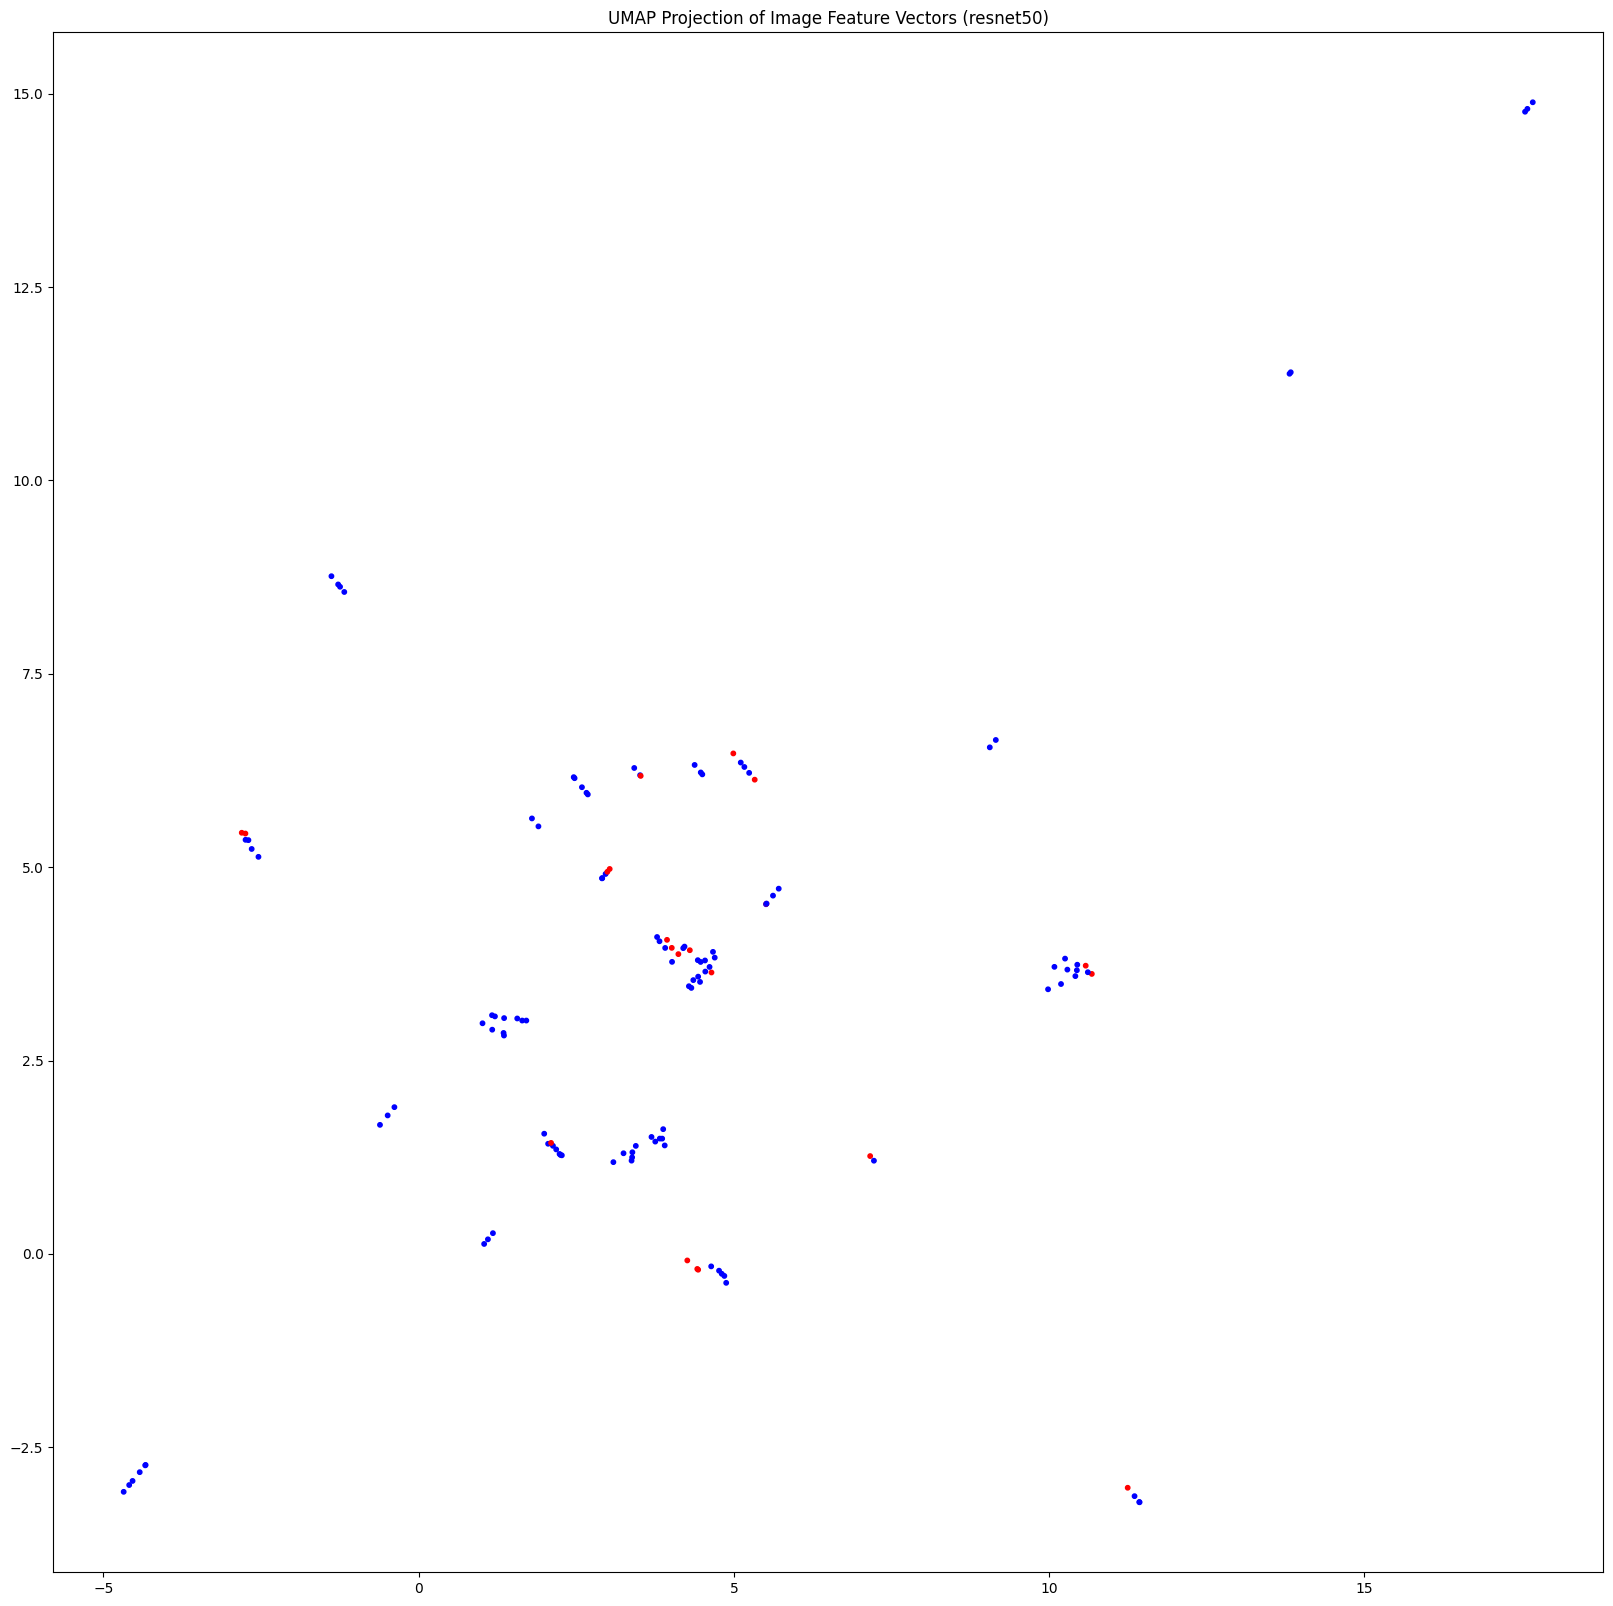

In [14]:
plt.figure(figsize=(20, 20))
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (resnet50)')

# for i, filename in enumerate(filenames_resnet50):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

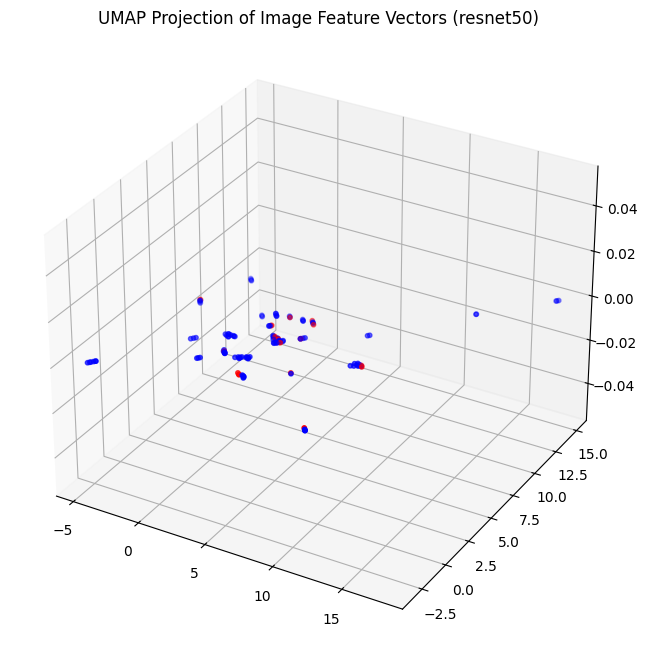

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (resnet50)')

plt.show()

In [16]:
fig = go.Figure(data=[go.Scatter3d(
    x=results[:, 0], y=results[:, 1], z=results[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (resnet50)",
)

fig.show()

## U-map для векторов siglip

In [25]:
features_siglip = np.array([siglip_dict[filename] for filename in siglip_dict])
features_siglip = np.array([
    np.array(siglip_dict[filename]).reshape(-1)
    for filename in siglip_dict
])

filenames_siglip = list(siglip_dict.keys())
filenames_pics_siglip = [filename.split('/')[-1] for filename in filenames_siglip]

In [26]:
umap_siglip = umap.UMAP(
            n_neighbors=2,
            n_components=7,
            metric='cosine', 
            min_dist=0.35,
            spread=0.35,
            random_state=42
            )

In [27]:
results_siglip = umap_siglip.fit_transform(features_siglip)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



#### Для всех картин в датасете

In [28]:
colors_siglip = []
for filename in filenames_pics_siglip:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_siglip.append('blue')
    elif int(filename.split('_')[0]) < 1902:
        colors_siglip.append('blue')
    else:
        colors_siglip.append('red') # red - after treatment

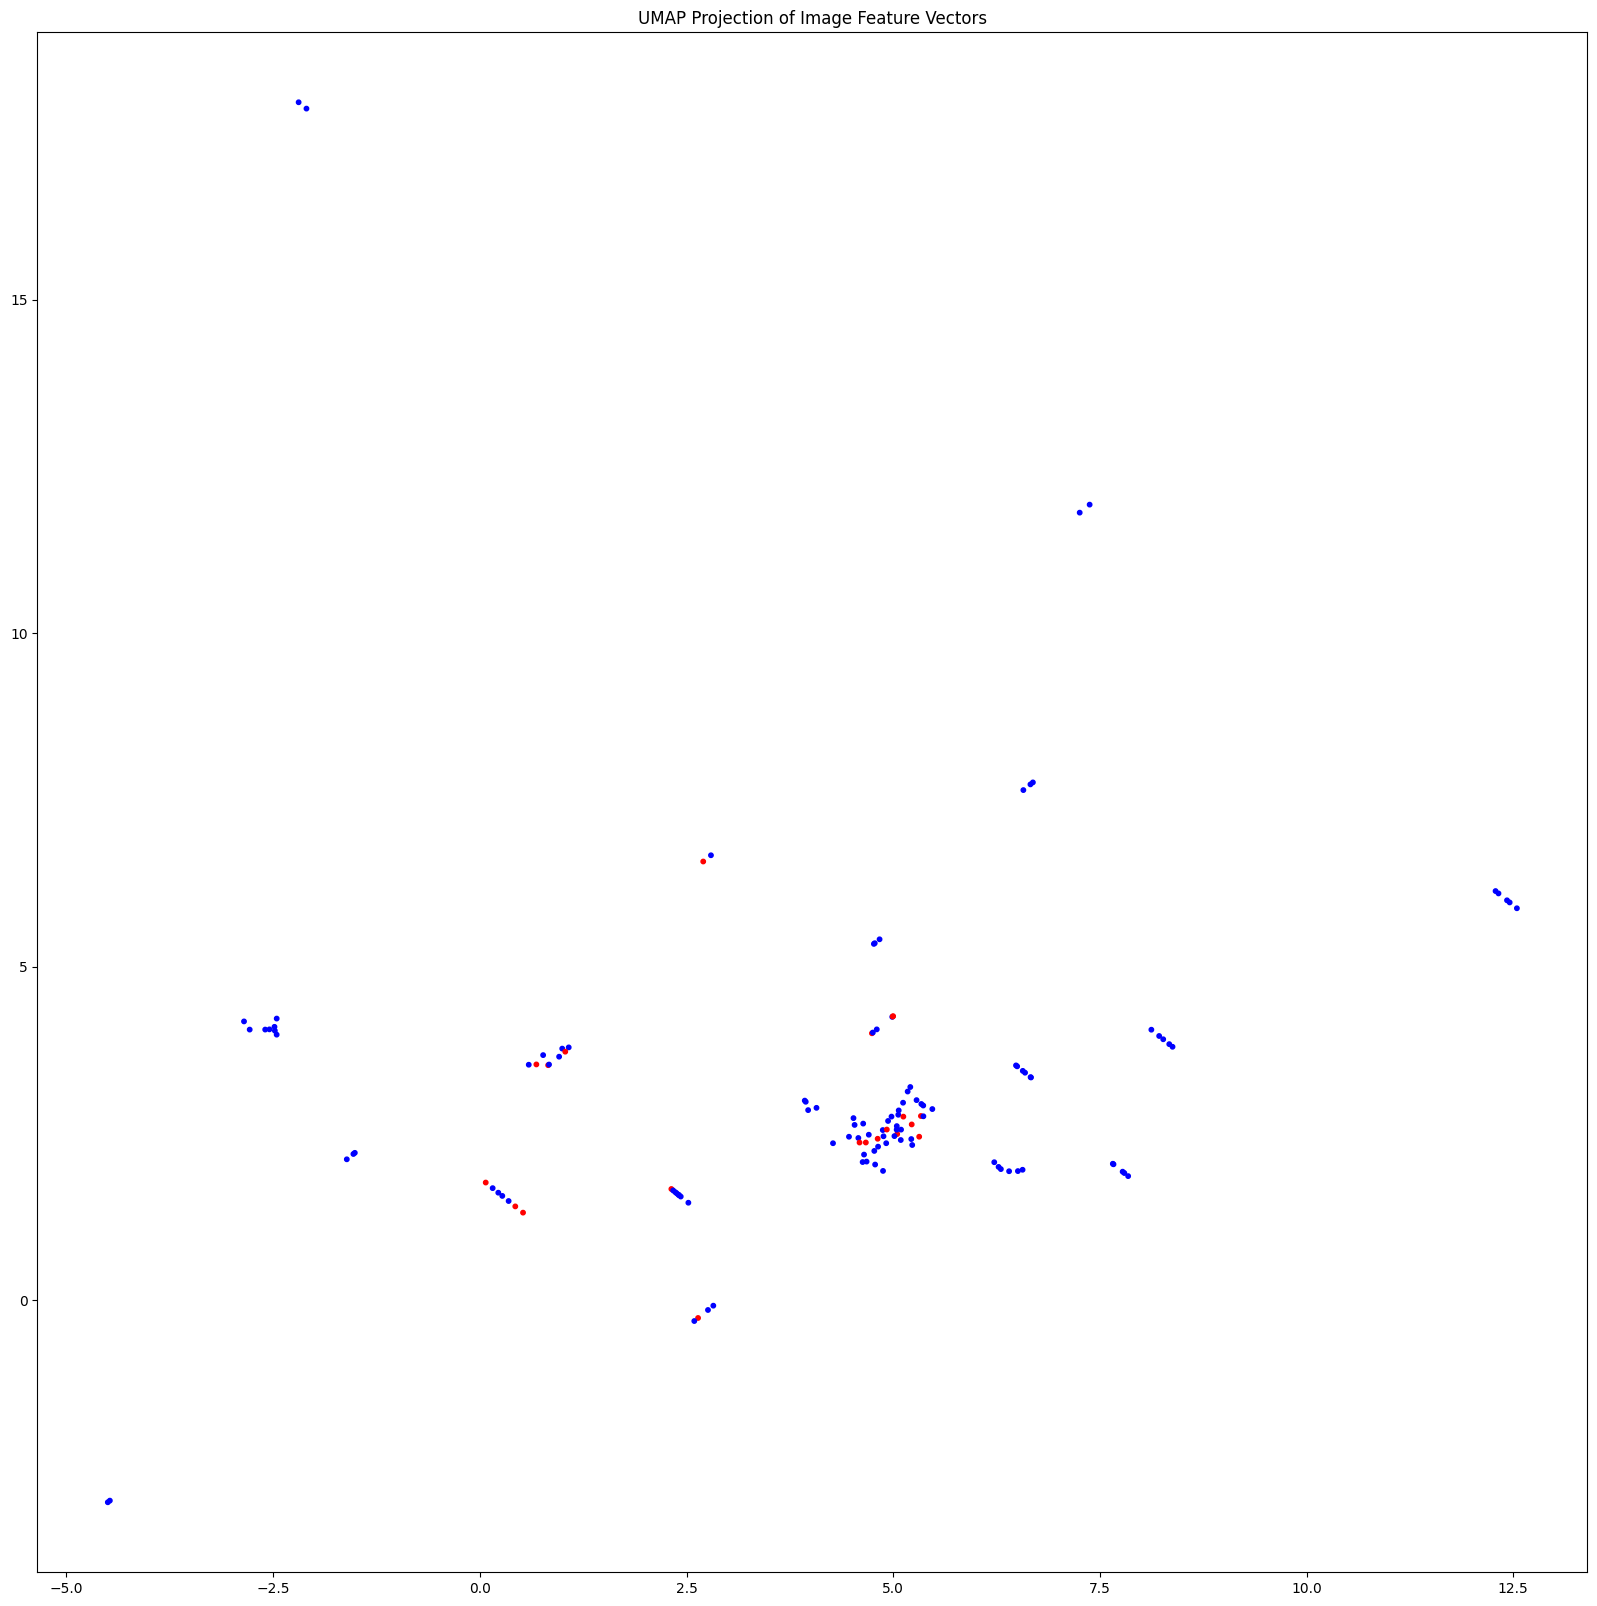

In [29]:
plt.figure(figsize=(20,20))
plt.scatter(results_siglip[:, 0], results_siglip[:, 1], s=10, c=colors_siglip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_siglip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_siglip[i, 0], results_siglip[i, 1]), fontsize=8)

plt.show()

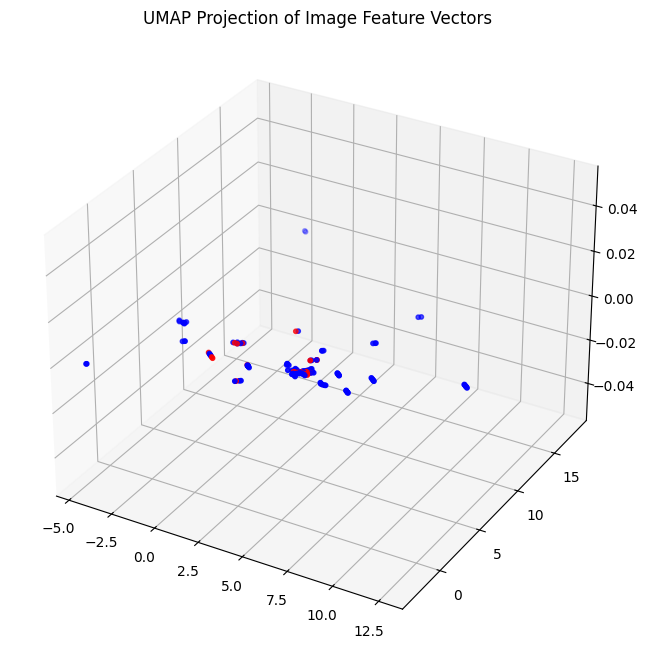

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_siglip[:, 0], results_siglip[:, 1], s=10, c=colors_siglip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

In [31]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_siglip[:, 0], y=results_siglip[:, 1], z=results_siglip[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_siglip, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (resnet50)",
)

fig.show()

## U-map для векторов ViT

In [32]:
features_vit = np.array([vit_dict[filename] for filename in vit_dict])
filenames_vit = list(vit_dict.keys())

In [33]:
filenames_pics_vit = [filename.split('/')[-1] for filename in filenames_vit]
print(len(filenames_pics_vit))

135


#### Для всех картин в датасете

In [35]:
umap_vit = umap.UMAP(
            n_neighbors=2,
            n_components=25, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

In [36]:
results_vit = umap_vit.fit_transform(features_vit)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [37]:
colors_vit = []
for filename in filenames_vit:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_vit.append('blue')
    elif int(filename.split('_')[0]) < 1902:
        colors_vit.append('blue')
    else:
        colors_vit.append('red') # red - after treatment

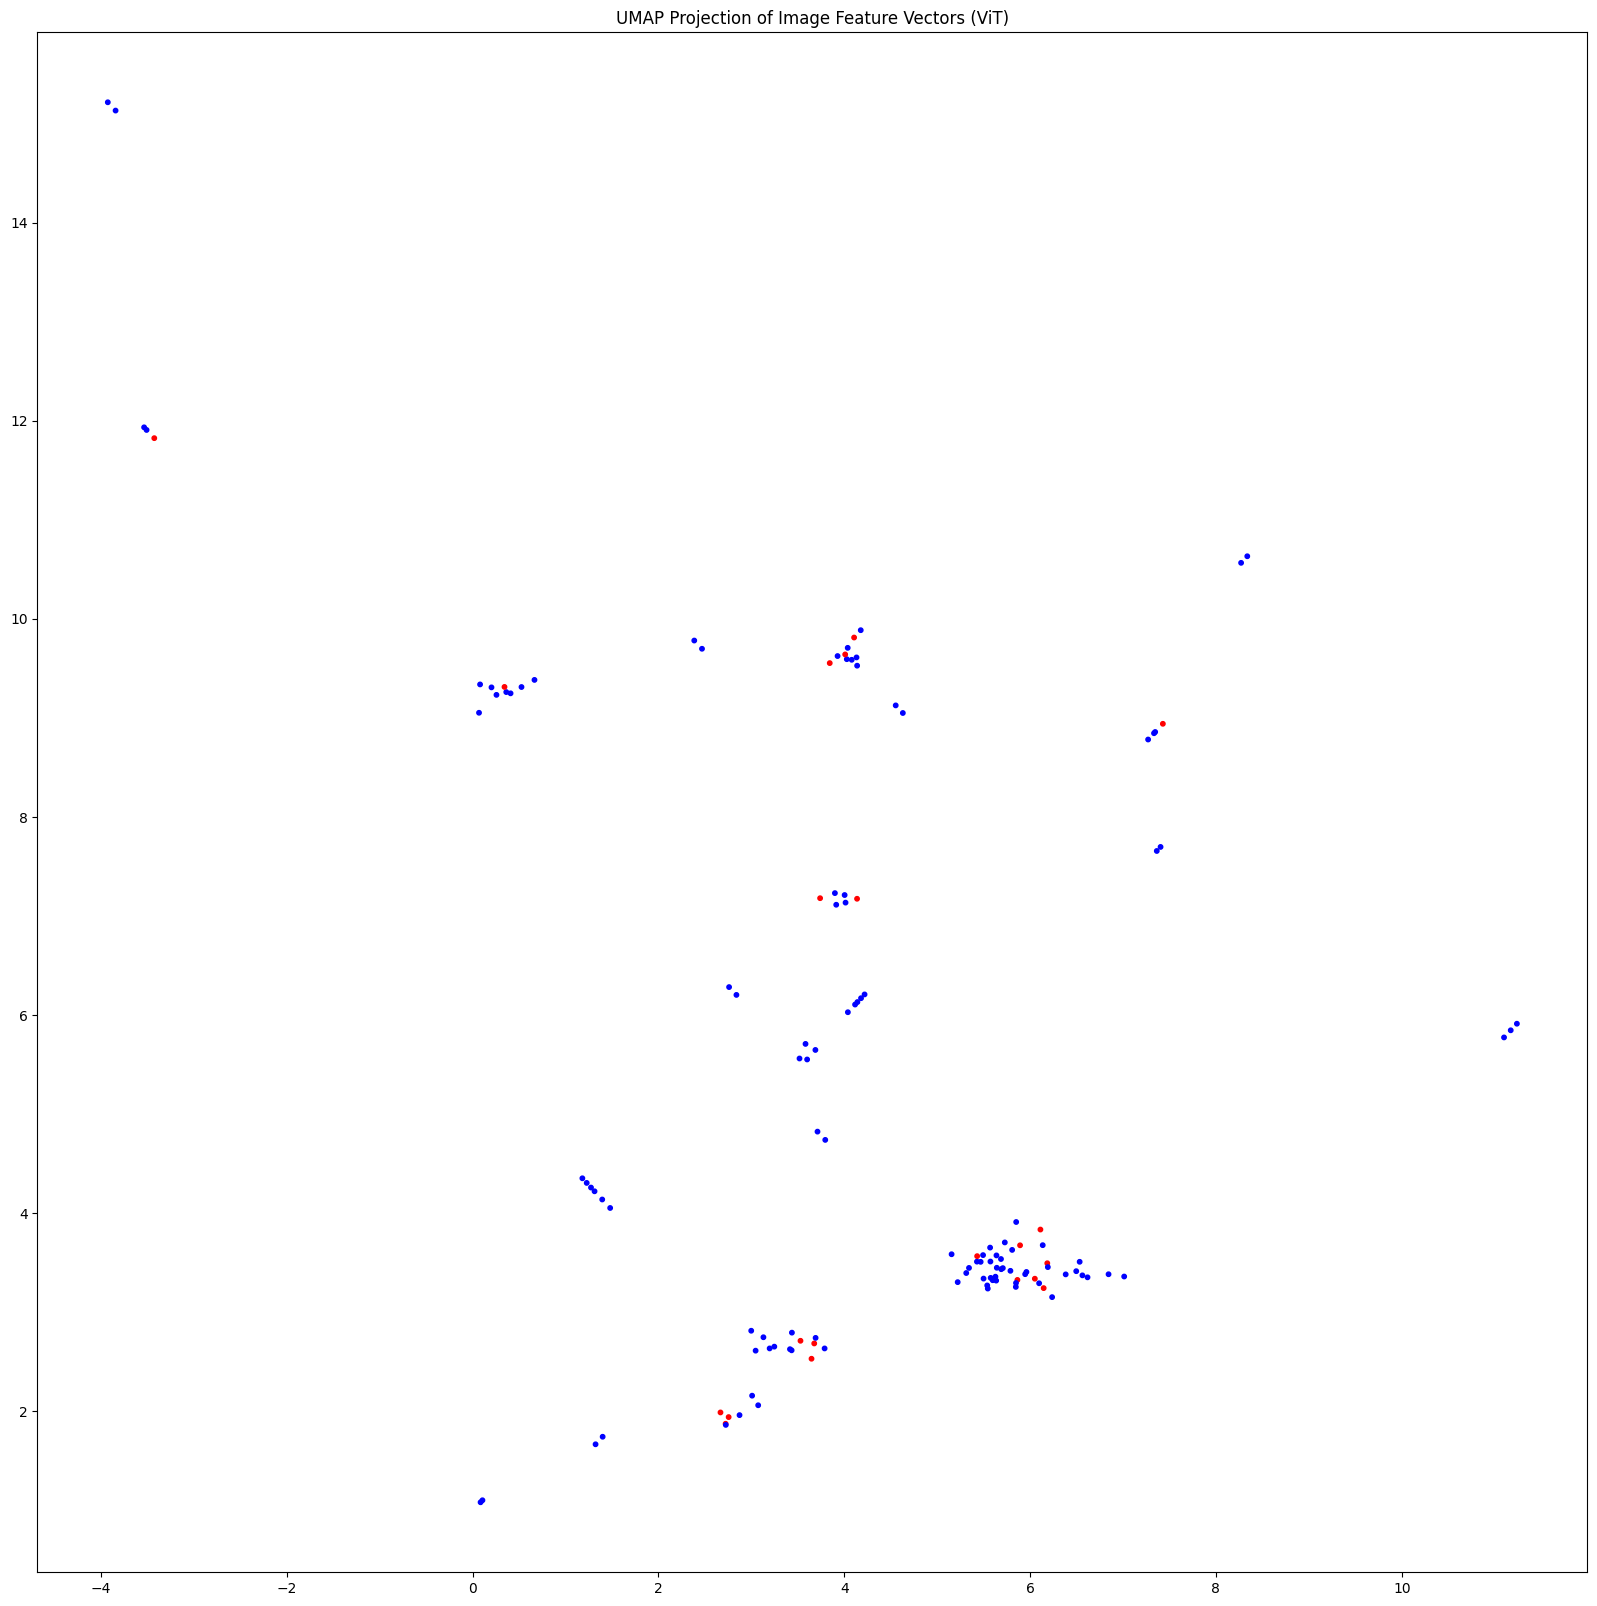

In [38]:
plt.figure(figsize=(20,20))
plt.scatter(results_vit[:, 0], results_vit[:, 1], s=10, c=colors_vit, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (ViT)')

# for i, filename in enumerate(filenames_vit):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vit[i, 0], results_vit[i, 1]), fontsize=8)

plt.show()

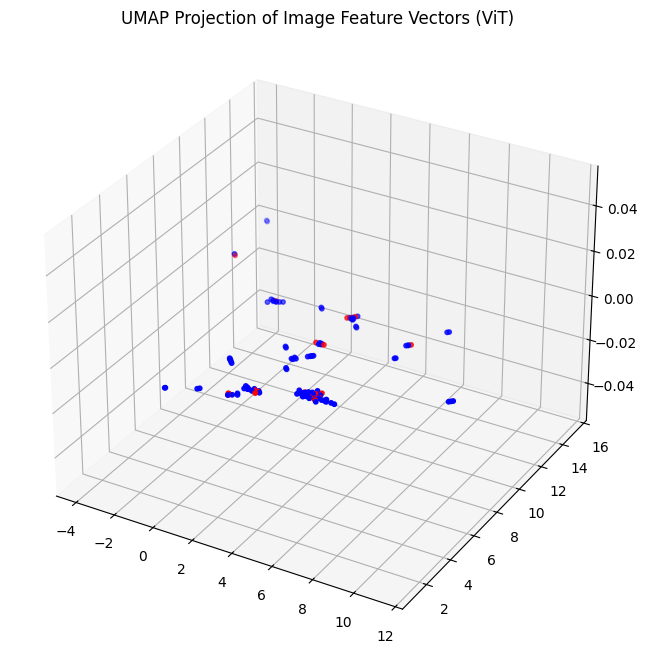

In [39]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_vit[:, 0], results_vit[:, 1], s=10, c=colors_vit, marker='o')
plt.title('UMAP Projection of Image Feature Vectors (ViT)')

# for i, filename in enumerate(filenames_vit):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vit[i, 0], results_vit[i, 1]), fontsize=8)

plt.show()

In [40]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_vit[:, 0], y=results_vit[:, 1], z=results_vit[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_vit, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (ViT)",
)

fig.show()

## U-map для векторов CLIP

In [41]:
features_clip = np.array([clip_dict[filename] for filename in clip_dict])
filenames_clip = list(clip_dict.keys())

In [42]:
filenames_pics_clip = [filename.split('/')[-1] for filename in filenames_clip]

In [43]:
umap_clip = umap.UMAP(
            n_neighbors=2,
            n_components=25, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

#### Для всех картинок в датасете

In [44]:
results_clip = umap_clip.fit_transform(features_clip)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [45]:
colors_clip = []
for filename in filenames_clip:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_clip.append('blue')
    elif int(filename.split('_')[0]) < 1902:
        colors_clip.append('blue')
    else:
        colors_clip.append('red') # red - after treatment

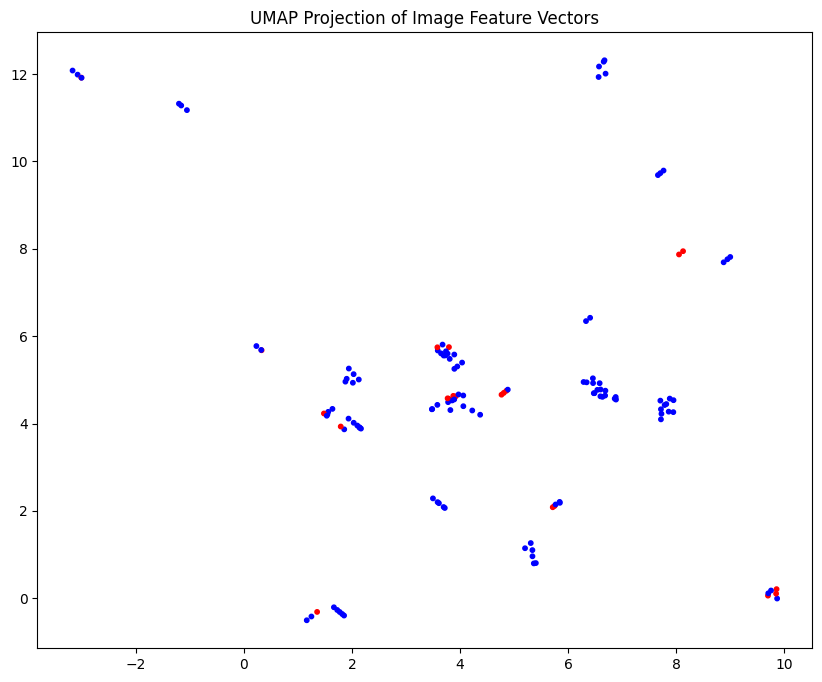

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(results_clip[:, 0], results_clip[:, 1], s=10, c=colors_clip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_clip[i, 0], results_clip[i, 1]), fontsize=8)

plt.show()

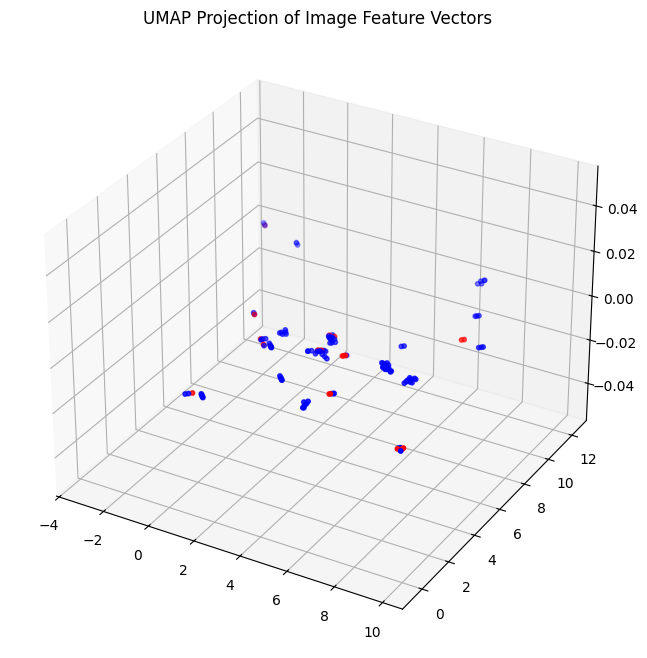

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_clip[:, 0], results_clip[:, 1], s=10, c=colors_clip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_clip[i, 0], results_clip[i, 1]), fontsize=8)

plt.show()

In [48]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_clip[:, 0], y=results_clip[:, 1], z=results_clip[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_clip, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (ViT)",
)

fig.show()

## U-map для векторов VGG19

In [49]:
features_vgg19 = np.array([vgg19_dict[filename] for filename in vgg19_dict])
filenames_vgg19 = list(vgg19_dict.keys())

In [50]:
filenames_pics_vgg19 = [filename.split('/')[-1] for filename in filenames_vgg19]

In [51]:
umap_vgg19 = umap.UMAP(
            n_neighbors=2,
            n_components=15, #25, 17
            metric='cosine', 
            min_dist=0.55,
            spread=0.57, #1.7, #0.57,
            random_state=42
            )

#### Для всех картинок в датасете

In [52]:
results_vgg19 = umap_vgg19.fit_transform(features_vgg19)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [53]:
colors_vgg19 = []
for filename in filenames_clip:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_vgg19.append('blue')
    elif int(filename.split('_')[0]) < 1902:
        colors_vgg19.append('blue')
    else:
        colors_vgg19.append('red') # red - after treatment

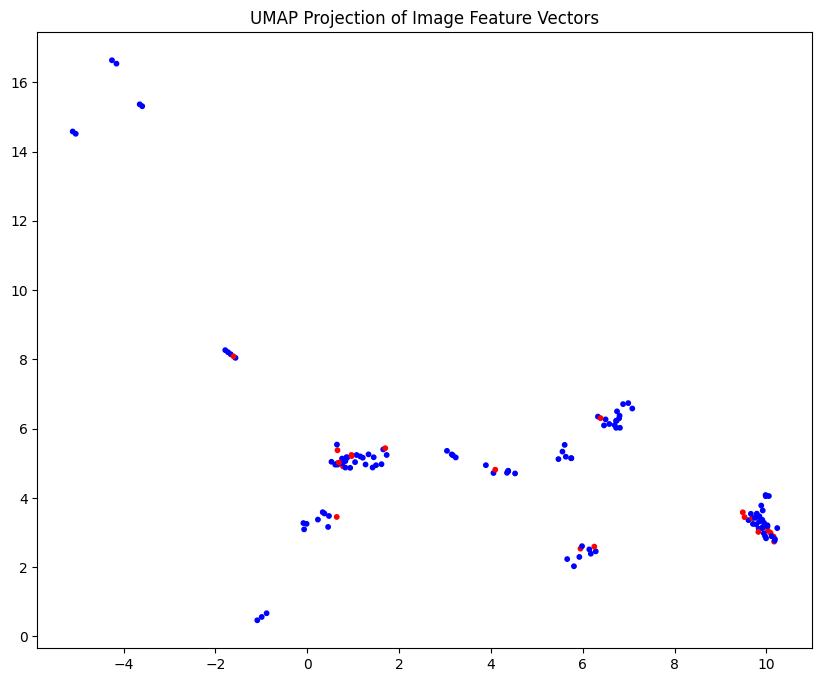

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(results_vgg19[:, 0], results_vgg19[:, 1], s=10, c=colors_vgg19, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_vgg19):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vgg19[i, 0], results_vgg19[i, 1]), fontsize=8)

plt.show()

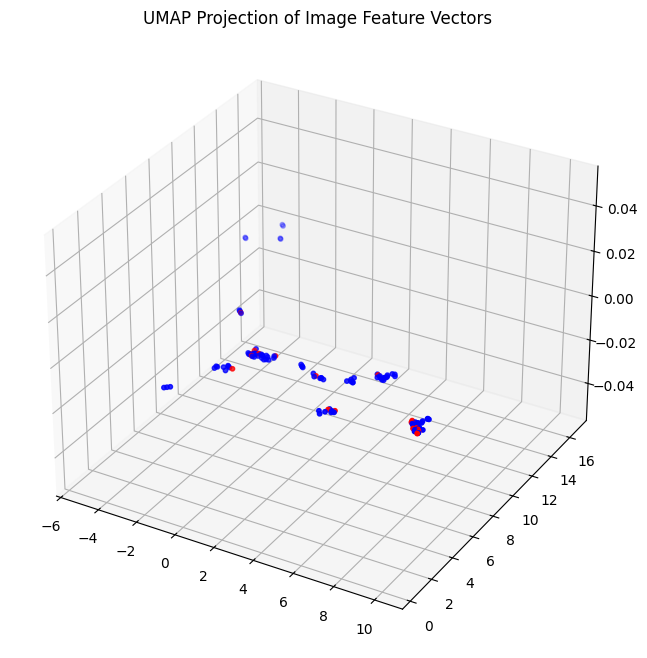

In [55]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_vgg19[:, 0], results_vgg19[:, 1], s=10, c=colors_vgg19, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')

# for i, filename in enumerate(filenames_vgg19):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vgg19[i, 0], results_vgg19[i, 1]), fontsize=8)

plt.show()

In [56]:
fig = go.Figure(data=[go.Scatter3d(
    x=results_vgg19[:, 0], y=results_vgg19[:, 1], z=results_vgg19[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors_vgg19, opacity=0.8)
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection (VGG19)",
)

fig.show()